<a href="https://colab.research.google.com/github/SubbulakshmiSN/Decision_tree_algo_study_for_wine_data/blob/main/winedataset_decision_tree_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *`IMPORT LIBRARIES`*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df= pd.read_csv("/content/Wine_Quality_Data (1).csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# *`DATA PREPROCESSING`*

In [4]:
'''
no null data

supervised learning - Desicion tree classifier

continuous_columns='alcohol','sulphates','pH','density','total_sulfur_dioxide','free_sulfur_dioxide','chlorides','residual_sugar','citric_acid','volatile_acidity',

categorical_columns='quality', 'color'

'''

"\nno null data\n\nsupervised learning - Desicion tree classifier\n\ncontinuous_columns='alcohol','sulphates','pH','density','total_sulfur_dioxide','free_sulfur_dioxide','chlorides','residual_sugar','citric_acid','volatile_acidity',\n          \ncategorical_columns='quality', 'color'\n\n"

In [5]:
#encoding the categorical data
encoder=OrdinalEncoder()
df.color=encoder.fit_transform(df[["color"]])

In [6]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

# *`MACHINE LEARNING`*

In [8]:
x=df.drop("quality",axis=1)
y=df["quality"]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)


In [10]:
#Decision Tree Classifier

model=DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([6, 6, 6, 6, 5, 6, 7, 7, 5, 7, 6, 6, 6, 6, 7, 7, 6, 5, 6, 6, 7, 6,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 7, 5, 6, 5, 7, 5, 5, 5,
       5, 5, 6, 6, 7, 5, 7, 6, 5, 6, 7, 7, 6, 6, 6, 5, 4, 6, 3, 6, 7, 6,
       6, 5, 6, 6, 6, 8, 5, 6, 5, 4, 6, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6, 6,
       6, 5, 6, 6, 5, 5, 7, 6, 6, 6, 6, 6, 6, 7, 8, 5, 7, 5, 7, 6, 5, 5,
       6, 8, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6, 4, 5, 4, 6, 5, 6, 6, 5,
       5, 6, 7, 5, 6, 5, 6, 7, 7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 6, 6, 5, 7, 6, 7, 7, 6, 7, 4, 5, 6, 5, 5, 6, 6, 7, 6, 5, 4,
       7, 6, 5, 5, 6, 8, 7, 5, 6, 6, 5, 6, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5,
       6, 6, 5, 3, 6, 5, 5, 5, 6, 4, 6, 6, 6, 7, 7, 5, 5, 5, 5, 5, 5, 5,
       7, 5, 4, 4, 7, 5, 6, 6, 8, 7, 4, 6, 6, 6, 8, 6, 5, 5, 6, 5, 6, 4,
       7, 7, 4, 5, 5, 5, 5, 8, 6, 5, 6, 7, 5, 7, 5, 6, 6, 7, 6, 8, 5, 7,
       5, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 7, 7,
       6, 7, 7, 5, 6, 7, 7, 6, 5, 8, 6, 6, 6, 6, 5,

In [12]:
confusion_matrix= confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  0,   0,   2,   0,   2,   0,   0],
       [  1,   7,  12,   9,   0,   0,   0],
       [  1,   9, 148,  47,   9,   2,   0],
       [  0,   7,  46, 201,  37,   4,   1],
       [  0,   1,   5,  21,  58,   4,   1],
       [  0,   0,   1,   5,   1,   7,   0],
       [  0,   1,   0,   0,   0,   0,   0]])

In [36]:
df_cm = pd.DataFrame(confusion_matrix, index=['Actual 3','Actual 4','Actual 5', 'Actual 6','Actual 7', 'Actual 8','Actual 9'],
                     columns=['Predicted 3','Predicted 4','Predicted 5', 'Predicted 6','Predicted 7', 'Predicted 8','Predicted 9'])
df_cm

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 3,0,0,2,0,2,0,0
Actual 4,1,7,12,9,0,0,0
Actual 5,1,9,148,47,9,2,0
Actual 6,0,7,46,201,37,4,1
Actual 7,0,1,5,21,58,4,1
Actual 8,0,0,1,5,1,7,0
Actual 9,0,1,0,0,0,0,0


In [41]:
def calculate_precision_recall(confusion_matrix):
    precision = {}
    recall = {}
    for i in range(3, 10):  # Change the range to start from 3 and end at 9
        idx = i - 3  # Adjust index for class names
        true_positives = confusion_matrix[idx][idx]
        false_positives = sum(confusion_matrix[j][idx] for j in range(7)) - true_positives
        false_negatives = sum(confusion_matrix[idx][j] for j in range(7)) - true_positives
        precision[f'Class {i}'] = round(true_positives / (true_positives + false_positives), 4) if (true_positives + false_positives) != 0 else 0
        recall[f'Class {i}'] = round(true_positives / (true_positives + false_negatives), 4) if (true_positives + false_negatives) != 0 else 0
    return precision, recall


precision, recall = calculate_precision_recall(confusion_matrix)
accuracy = round(accuracy_score(y_test, y_pred), 4)
print("Accuracy:")
print(accuracy)
print("\nPrecision:")
print(precision)
print("\nRecall:")
print(recall)

Accuracy:
0.6477

Precision:
{'Class 3': 0.0, 'Class 4': 0.28, 'Class 5': 0.6916, 'Class 6': 0.7102, 'Class 7': 0.5421, 'Class 8': 0.4118, 'Class 9': 0.0}

Recall:
{'Class 3': 0.0, 'Class 4': 0.2414, 'Class 5': 0.6852, 'Class 6': 0.6791, 'Class 7': 0.6444, 'Class 8': 0.5, 'Class 9': 0.0}


# *`DECISION TREE - HOW IT WORKS?`*



> `Decision tree is a popular supervised learning algorithm used for both classification and regression tasks`



> `It's called a "tree" because it consists of a hierarchical structure of nodes, where each node represents a decision based on a feature.`





### **`WORKING PRINCIPLE`**



1.   Understanding the data
2.   Selecting the Best Split
3.   Splitting the Data
4.   Repeating the Process
5.   Building the Tree
6.   Predicting New Instances






# *`ENTROPY- GAIN`*



> `Entropy and information gain are concepts used in decision tree algorithms, particularly in determining the best split for partitioning data.`


### **`ENTROPY`**

> `Entropy is a measure of impurity or disorder in a set of examples. In the context of decision trees, entropy is used to quantify the uncertainty of a given dataset before and after a split based on a particular attribute. The entropy of a dataset is calculated using the formula:`










ENT2.PNG


```
Where:
S is the dataset.
c is the number of classes in the dataset.
pi is the proportion of examples in class i in the dataset.
```


> `Entropy ranges from 0 to 1, where 0 indicates perfect homogeneity (all examples belong to the same class) and 1 indicates maximum heterogeneity (examples are evenly distributed across all classes)`








### **`INFORMATION GAIN`**

> `Information gain measures the reduction in entropy or uncertainty achieved by splitting a dataset based on a particular attribute. It helps the decision tree algorithm decide which attribute to split on at each node. The formula to calculate information gain is:`




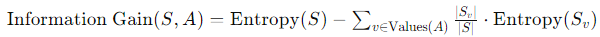


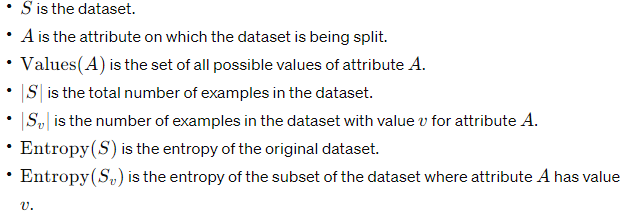



> `Information gain is used to select the attribute that maximizes the reduction in entropy, resulting in the most homogenous subsets after the split`



# ***`GRAPH REPRESENTATION OF NODES IN TREE`***

In [39]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = x.columns, class_names = ['3','4','5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("wine.pdf")

True

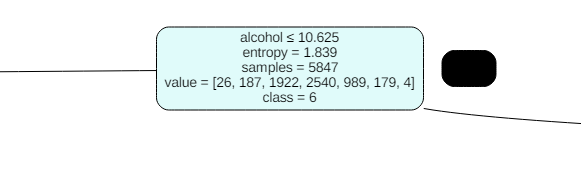

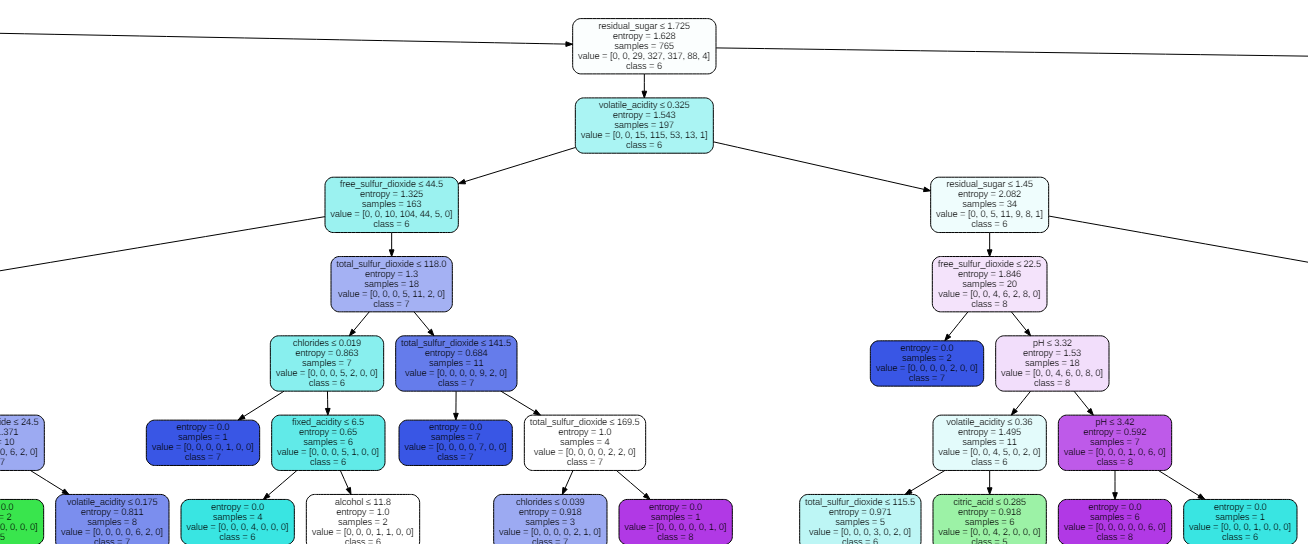